# Assignment 1

Download the taxi-fare-train.csv and the taxi-fare-test.csv data sets and save them to the Data folder you've created at the previous step. We use these data sets to train the machine learning model and then evaluate how accurate the model is. These data sets are originally from the NYC TLC Taxi Trip data set.

1. Train.csv https://github.com/dotnet/machinelearning/blob/master/test/data/taxi-fare-train.csv
2. Test.csv https://github.com/dotnet/machinelearning/blob/master/test/data/taxi-fare-test.csv
3. Original link https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

The label is the column you want to predict. The identified Features are the inputs you give the model to predict the Label.

The provided data set contains the following columns:

    vendor_id: The ID of the taxi vendor is a feature.
    rate_code: The rate type of the taxi trip is a feature.
    passenger_count: The number of passengers on the trip is a feature.
    trip_time_in_secs: The amount of time the trip took. You want to predict the fare of the trip before the trip is completed. At that moment, you don't know how long the trip would take. Thus, the trip time is not a feature and you'll exclude this column from the model.
    trip_distance: The distance of the trip is a feature.
    payment_type: The payment method (cash or credit card) is a feature.
    fare_amount: The total taxi fare paid is the label.


This problem is about predicting a taxi trip fare in New York City. At first glance, it may seem to depend simply on the distance traveled. However, taxi vendors in New York charge varying amounts for other factors such as additional passengers or paying with a credit card instead of cash. You want to predict the price value, which is a real value, based on the other factors in the dataset. To do that, you choose a regression machine learning task.

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os


In [3]:
#Read train data
os.chdir('B:\\Travel\\US\\USF_Course\\GA')

In [4]:
df = pd.read_csv('taxi-fare-train.csv')

In [5]:
df.head(3)

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.8,CRD,17.5
1,CMT,1,1,474,1.5,CRD,8.0
2,CMT,1,1,637,1.4,CRD,8.5


In [6]:
print(df.shape)

(1048575, 7)


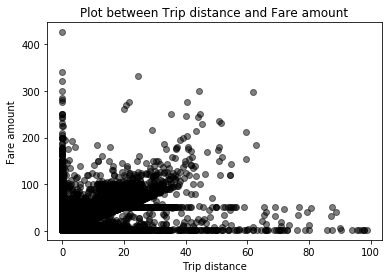

In [17]:
colors=(0,0,0)
plt.scatter(df.trip_distance, df.fare_amount, c=colors, alpha=0.5)
plt.title('Plot between Trip distance and Fare amount')
plt.xlabel('Trip distance')
plt.ylabel('Fare amount')
plt.show()

In [37]:
df_passengers_1 = df[df.passenger_count==1]
df_passengers_2 = df[df.passenger_count==2]
df_passengers_3 = df[df.passenger_count==3]
df_passengers_4 = df[df.passenger_count==4]
df_passengers_5 = df[df.passenger_count==5]
df_passengers_6 = df[df.passenger_count==6]
print(df_passengers_3.head(3))

   vendor_id  rate_code  passenger_count  trip_time_in_secs  trip_distance  \
16       CMT          1                3                371            0.6   
21       CMT          1                3                485            0.8   
59       CMT          1                3                820            2.6   

   payment_type  fare_amount  
16          CRD          6.0  
21          CSH          6.5  
59          CRD         11.5  


In [41]:
g1=(df_passengers_1.passenger_count, df_passengers_1.fare_amount)
g2=(df_passengers_2.passenger_count, df_passengers_2.fare_amount)
g3=(df_passengers_3.passenger_count, df_passengers_3.fare_amount)
g4=(df_passengers_4.passenger_count, df_passengers_4.fare_amount)
g5=(df_passengers_5.passenger_count, df_passengers_5.fare_amount)
g6=(df_passengers_6.passenger_count, df_passengers_6.fare_amount)

data = (g1,g2,g3,g4,g5,g6)
colors = ('red', 'blue', 'green', 'black', 'teal', 'yellow')
groups = ('pas_1', 'pas_2', 'pas_3', 'pas_4', 'pas_5', 'pas_6',)

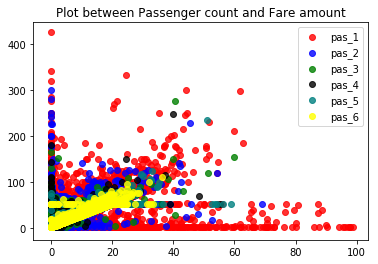

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=df_passengers_1.trip_distance
y=df_passengers_1.fare_amount
ax.scatter(x, y, alpha=0.8, c='red', label='pas_1')

x=df_passengers_2.trip_distance
y=df_passengers_2.fare_amount
ax.scatter(x, y, alpha=0.8, c='blue', label= 'pas_2')

x=df_passengers_3.trip_distance
y=df_passengers_3.fare_amount
ax.scatter(x, y, alpha=0.8, c='green', label= 'pas_3')

x=df_passengers_4.trip_distance
y=df_passengers_4.fare_amount
ax.scatter(x, y, alpha=0.8, c='black', label= 'pas_4')

x=df_passengers_5.trip_distance
y=df_passengers_5.fare_amount
ax.scatter(x, y, alpha=0.8, c='teal', label= 'pas_5')

x=df_passengers_6.trip_distance
y=df_passengers_6.fare_amount
ax.scatter(x, y, alpha=0.8, c='yellow', label= 'pas_6')

plt.title('Plot between Trip distance and Fare amount')
plt.xlabel('Trip distance')
plt.ylabel('Fare amount')
plt.legend(loc=1)
plt.show()

#Try a for loop for the above:
#for data, color, group in zip(data, colors, groups):
#    x,y=data
#    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

In [51]:
df.dtypes #Check data types and change if needed

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

In [54]:
df.isnull().sum() #Check number of NAs or missing values

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

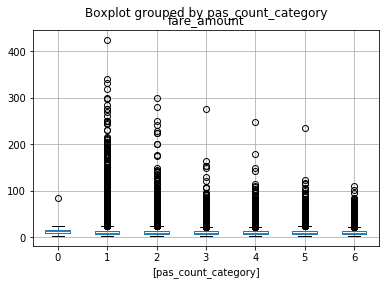

In [71]:
df_fare = df.filter(['fare_amount', 'passenger_count'], axis=1)

df_fare['pas_count_category'] = df_fare.passenger_count.astype('category')
df_fare = df.filter(['fare_amount', 'pas_count_category'])

df_fare.boxplot(by='pas_count_category')

plt.show()

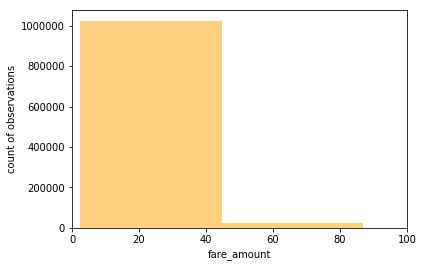

In [77]:
#Histogram of fare_amount
x = df.fare_amount
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='orange', alpha=0.5)
plt.xlim(xmin=0, xmax=100)
plt.xlabel('fare_amount')
plt.ylabel('count of observations')
plt.show()

# Assignment 2

Use the data frame from Assignment 1 for this assignment
This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame) and Make a stratified 80-20 split based on target to ensure there are no biases in the dataset. Predict the "fare_amount" using a stochastic gradient descent regressor. Calculate the Root Mean Square Error. Also, plot Learning Curve for the model. Provide your intepretations based on these metrics.

<ul>
    <li>Import the required libraries</li>
    <li>Make an 80-20 stratified split based on the target data</li>
    <li>Preprocess the data (Encode the  categorical features and Standardize the numerical features)</li>
    <li>Build a stochastic gradient descent regressor, train the model and make predictions using it</li>
    <li>Evaluate your model based on the various metrics stated above</li>
    <li>Plot Learning curve and provide insights</li>
</ul>

In [80]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le_vendorId = LabelEncoder()
df['vendor_id_encoded'] = le_vendorId.fit_transform(df.vendor_id)

In [81]:
from sklearn.model_selection import train_test_split

X=df.filter(['vendor_id_encoded', 'trip_distance']) #Include other columns in your model
y=df.filter(['fare_amount'])

X_train, X_test, y_train, y_test=train_test_split(X,y)

In [82]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((786431, 2), (262144, 2), (786431, 1), (262144, 1))


In [85]:
import numpy as np
from sklearn.linear_model import SGDRegressor

In [87]:
#sgd_reg_mdl = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg_mdl = SGDRegressor(max_iter=1000, tol=1e-3)

In [88]:
sgd_reg_mdl.fit(X_train, y_train)
SGDRegressor()

C:\Users\brindhasrikrishna\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [89]:
y_pred1=sgd_reg_mdl.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse1=mean_squared_error(y_test,y_pred1)
print('Mean Squared Error is: ', mse1)
mae1=mean_absolute_error(y_test,y_pred1)
print('Mean Absolute Error is: ', mae1)

#Interpret the MSE and MAE of this model and take measures to improve these errors

('Mean Squared Error is: ', 20.013601988857133)
('Mean Absolute Error is: ', 1.6722280707506687)


C:\Users\brindhasrikrishna\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1229: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


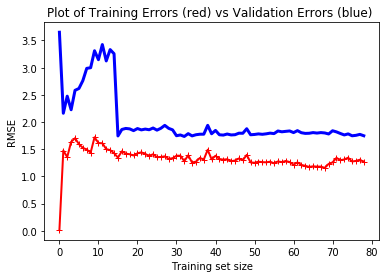

In [94]:
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.title('Plot of Training Errors (red) vs Validation Errors (blue) ')
    
df_sample=df.sample(100)
#print(df_sample.head(10))

X_sample=df_sample.filter(['vendor_id_encoded', 'trip_distance']) #Include the other variables also here
y_sample=df_sample.filter(['fare_amount'])
plot_learning_curves(sgd_reg_mdl,X_sample, y_sample)

# Assignment 3

1. Load the same data set as before in Assignment 1 and 2
2. Visualize the distribution of each key attibute
3. Split the data into training and test sets
4. For the support vector models to perform better, scale the data (if it is required)
5. Build a linear SVR model and analyse its performances
6. Build a SVR model with a linear kernel and compare its performances with the Linear SVR model
7. Using a sample from the original data, plot a learning curve for the SVR model and interpret the results

Create a model that has higher accuracy.

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le_vendorId = LabelEncoder()
df['vendor_id_encoded'] = le_vendorId.fit_transform(df.vendor_id)

In [8]:
from sklearn.model_selection import train_test_split

X=df.filter(['vendor_id_encoded','trip_time_in_secs' 'trip_distance']) #Include other columns in your model
y=df.filter(['fare_amount'])

X_train, X_test, y_train, y_test=train_test_split(X,y)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((786431, 1), (262144, 1), (786431, 1), (262144, 1))


In [10]:
from sklearn.svm import LinearSVR

svm_reg1=LinearSVR(epsilon=0.05)
svm_reg1.fit(X_train, y_train)
y_pred1=svm_reg1.predict(X_test)

C:\Users\brindhasrikrishna\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse1=mean_squared_error(y_test,y_pred1)
print(mse1)
mae1=mean_absolute_error(y_test,y_pred1)
print(mae1)

#Interpret the MSE and MAE and improve the accuracy of these measures

100.63130718498161
5.429732625158822


In [ ]:
from sklearn.svm import SVR

svm_reg2=SVR(kernel='linear', epsilon=0.05)
svm_reg2.fit(X_train, y_train)
y_pred2=svm_reg2.predict(X_test)

mse2=mean_squared_error(y_test,y_pred2)
print('Mean Squared Error is: ', mse2)
mae2=mean_absolute_error(y_test,y_pred2)
print('Mean Absolute Error is: ', mae1)

In [ ]:
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.title('Plot of Training Errors (red) vs Validation Errors (blue) ')
    
df_sample=df.sample(100)
X_sample=df_sample.filter(['vendor_id_encoded', 'trip_distance']) #Include the other variables also here
y_sample=df_sample.filter(['fare_amount'])
plot_learning_curves(svm_reg2,X_sample, y_sample)